In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =pd.read_csv("personality_datasert.csv")
data.head(5)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [3]:
data.isnull().sum()

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(402)

In [8]:
data.dtypes

Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object

<Axes: xlabel='Personality', ylabel='Social_event_attendance'>

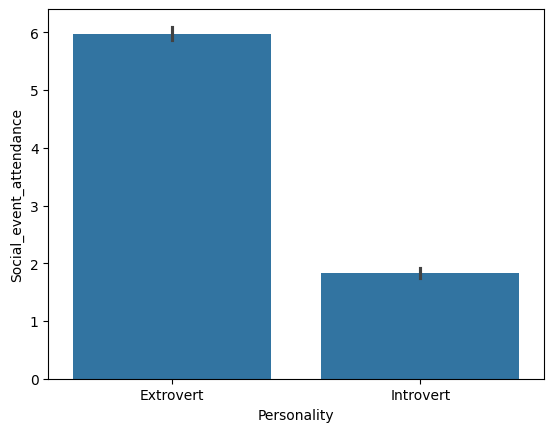

In [10]:
sns.barplot(data=data,
            x = data["Personality"],
            y = data["Social_event_attendance"]
            )

In [14]:
Count_intro_extro = data.groupby("Personality").size()
print(Count_intro_extro)

Personality
Extrovert    1491
Introvert    1409
dtype: int64


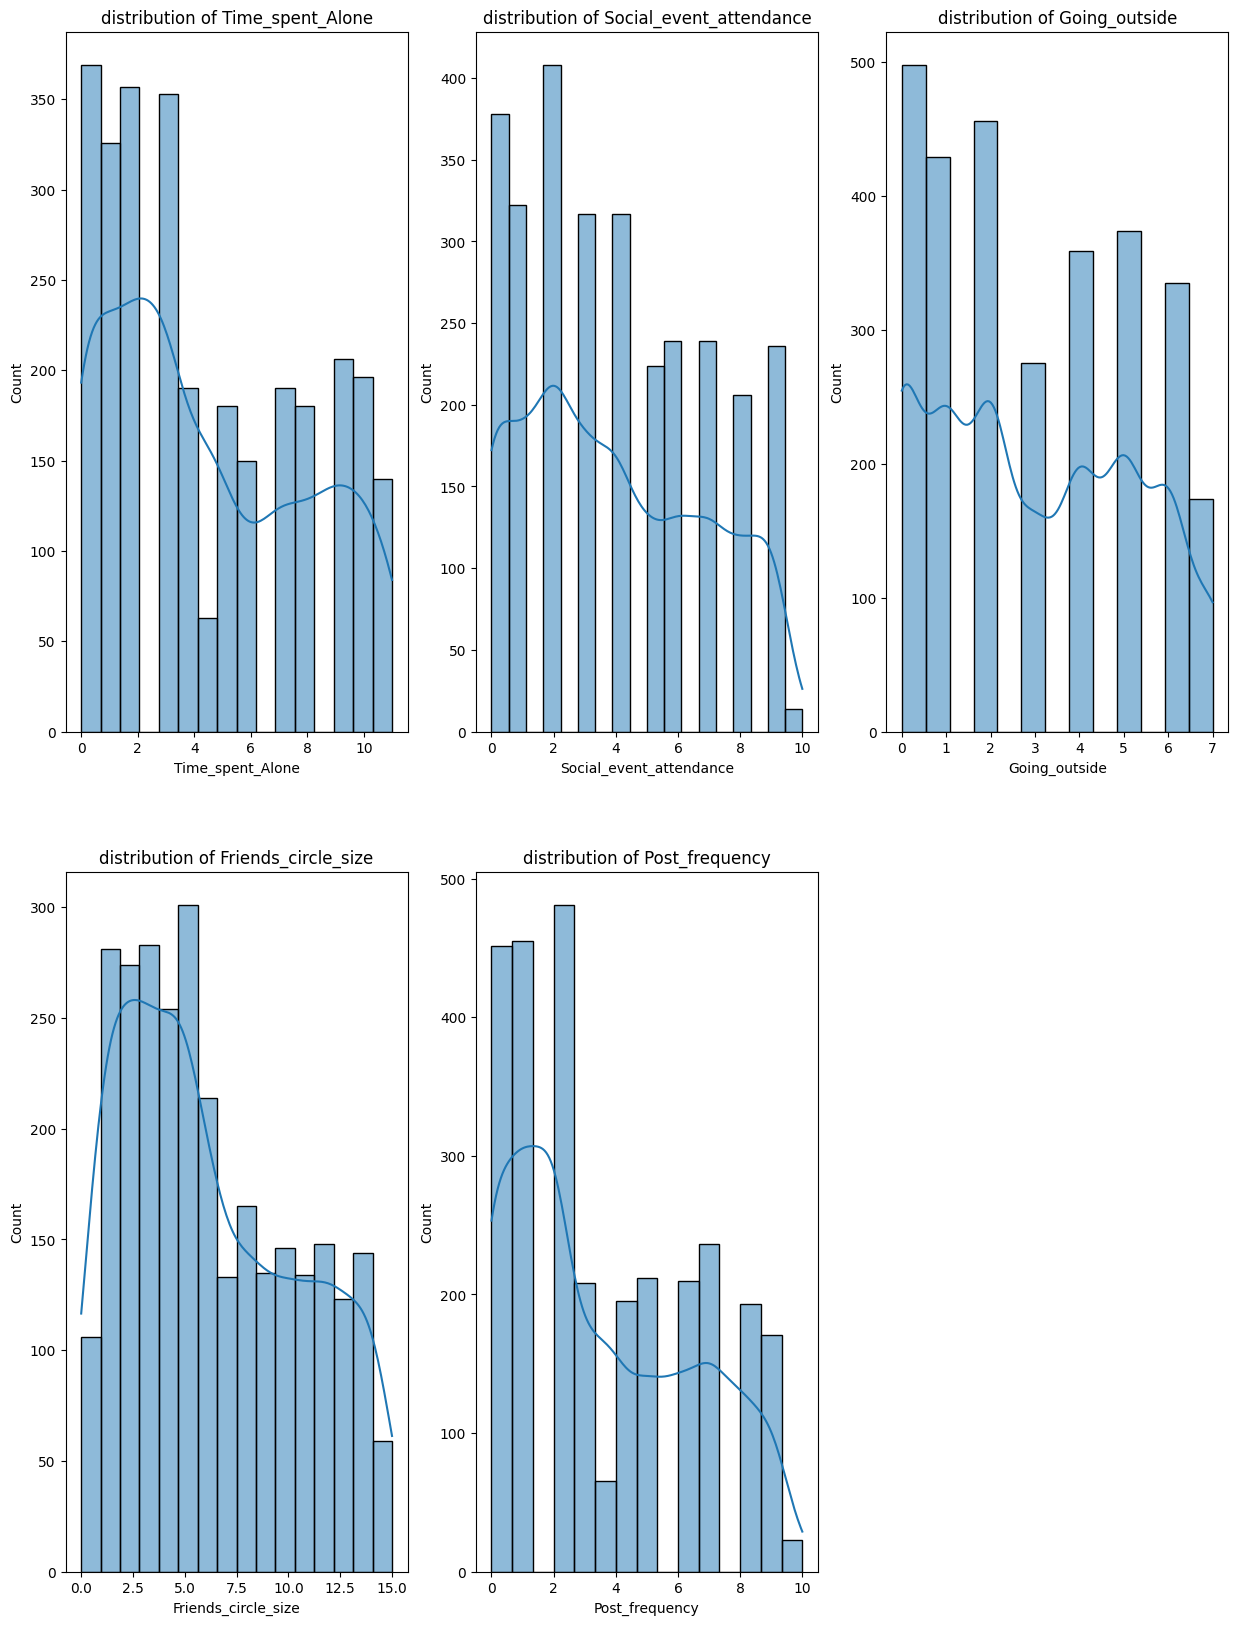

In [27]:
numeric_col = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
plt.figure(figsize=(15,20))
for i , col in enumerate(numeric_col):
    plt.subplot(2, 3 ,i+1)
    sns.histplot(data[col], kde = True)
    plt.title(f"distribution of {col}")

plt.tight_layout
plt.show()


# Data Preprocessing and HeatMap


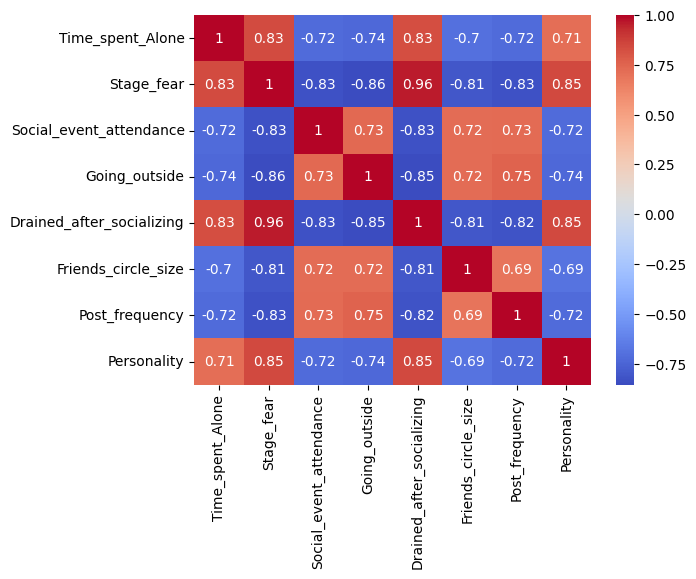

In [30]:
from sklearn.preprocessing import LabelEncoder
df_encoded = data.copy()


df_encoded["Stage_fear"] = LabelEncoder().fit_transform(df_encoded["Stage_fear"])
df_encoded["Drained_after_socializing"] = LabelEncoder().fit_transform(df_encoded["Drained_after_socializing"])
df_encoded["Personality"] = LabelEncoder().fit_transform(df_encoded["Personality"])  


# Heat map
plt.Figure( figsize=(10,5))
sns.heatmap(df_encoded.corr(), 
            annot=True,
            cmap= "coolwarm")

plt.show()


# ✅ Correlation Insights:
## From the heatmap:

Social_event_attendance, Going_outside, and Friends_circle_size have negative correlation with being an Introvert (i.e., positively related to Extroverts).

Time_spent_Alone and Drained_after_socializing show positive correlation with Introverts.

No pair of features shows strong multicollinearity, which is good for regression models.


# **Logistic Regression – predict Personality (Introvert = 1, Extrovert = 0)**

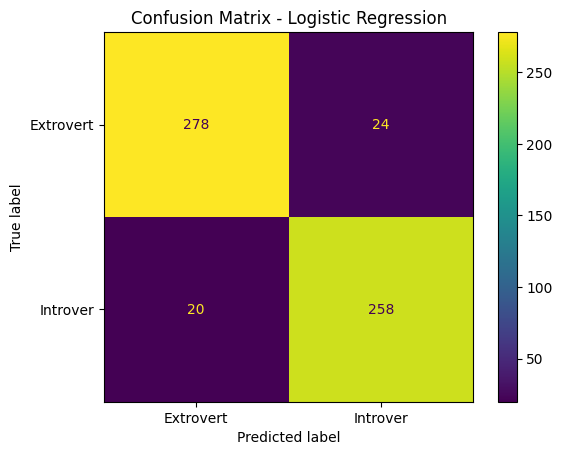

,precision,recall,f1-score,support
0,0.932886,0.920530,0.926667,302.000000
1,0.914894,0.928058,0.921429,278.000000
accuracy,0.924138,0.924138,0.924138,0.924138
macro avg,0.923890,0.924294,0.924048,580.000000
weighted avg,0.924262,0.924138,0.924156,580.000000


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Features and Target select
X = df_encoded.drop("Personality" , axis=1) # Target
y = df_encoded["Personality"] # Predicting

# Train and Test 0.2 is testing and 0.8 bydefaul becomes training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Train Logistic
lg = LogisticRegression(max_iter = 1000)
lg.fit(X_train,y_train)

y_pred = lg.predict(X_test)
report = classification_report(y_test,y_pred,output_dict=True)
cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Extrovert", "Introver"]).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
pd.DataFrame(report).T

# CONCLUSION
## ✅ Logistic Regression Results
        Accuracy: 92.41%

        Precision:

        Extrovert: 93.3%

        Introvert: 91.5%

        Recall:

        Extrovert: 92.1%

        Introvert: 92.8%

        F1 Score: Balanced and high for both classes

        📊 Conclusion: The logistic regression model is highly accurate in predicting whether a person is an introvert or extrovert based on behavioral features.

# Next: We'll build a Linear Regression model to predict a continuous variable 

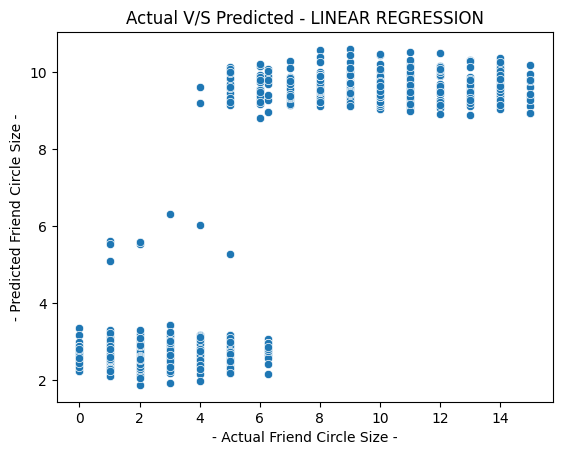

Mean Squared Error = 6.01782116003548
r2 = 0.6695472941256282


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target adn predictied value
X_lr = df_encoded.drop("Friends_circle_size",axis=1)
y_lr = df_encoded["Friends_circle_size"]

#Train test split
X_lr_train, X_lr_test, y_lr_train, y_lr_test = train_test_split(X_lr,y_lr,test_size = 0.2, random_state = 42)

# train and fit
lr = LinearRegression()
lr.fit(X_lr_train, y_lr_train)
y_pred_lr = lr.predict(X_lr_test)

# metrics

mse = mean_squared_error(y_lr_test,y_pred_lr)
r2 = r2_score(y_lr_test,y_pred_lr)

#visualize
plt.Figure(figsize=(8,6))
sns.scatterplot(x = y_lr_test,
                y = y_pred_lr,
                )
plt.xlabel("- Actual Friend Circle Size -")
plt.ylabel("- Predicted Friend Circle Size -")
plt.title("Actual V/S Predicted - LINEAR REGRESSION")
plt.show()

print(f'Mean Squared Error = {mse}')
print(f"r2 = {r2}")

# ✅ Linear Regression Results
  ##  Mean Squared Error (MSE): ~6.02

  ##  R² Score: 0.67


# 📊 Interpretation:

        The model explains 67% of the variance in Friends_circle_size.

        A reasonably good fit, indicating the chosen behavioral features are useful predictors for estimating social connectivity.



# Next, we'll perform KMeans Clustering to discover hidden personality-like groups from behavior — completely unsupervised.

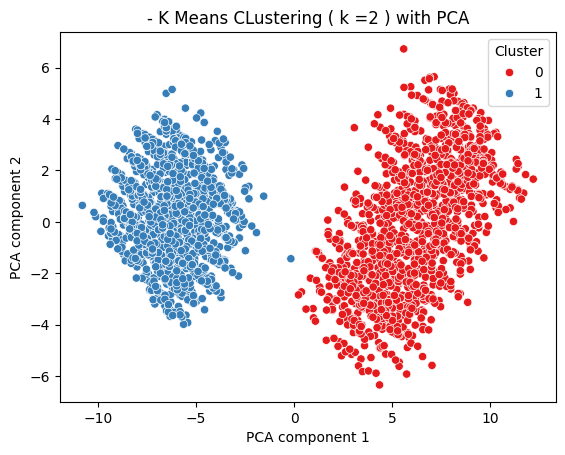

In [50]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# # Drop Targer column for Unsupervised clustering
X_cluster = df_encoded.drop("Personality",axis =1)

# Applying Kmeans
kmeans = KMeans(n_clusters = 2,random_state = 42)
df_encoded['Clusters'] = kmeans.fit_predict(X_cluster)

#Reduce  Dimensions For visualization using PCA
pca =PCA(n_components = 2) 
components = pca.fit_transform(X_cluster)


plt.Figure(figsize=(8,5))
sns.scatterplot(
    x = components[:,0],
    y = components[:,1],
    hue = df_encoded["Clusters"],
    palette="Set1"
)
plt.title("- K Means CLustering ( k =2 ) with PCA")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(title = "Cluster")
plt.show()

# ✅ KMeans Clustering Results
    The scatter plot shows two distinct clusters based on user behavior, identified by KMeans.

    These clusters are unsupervised, yet likely overlap with the Introvert/Extrovert labels.

    PCA helped reduce the dimensions for clear visualization.



| Task                          | Model Used          | Key Metric | Performance              |
| ----------------------------- | ------------------- | ---------- | ------------------------ |
| 🧠 Personality Classification | Logistic Regression | Accuracy   | **92.4%**                |
| 👥 Social Circle Prediction   | Linear Regression   | R² Score   | **0.67**                 |
| 🤖 Personality-like Grouping  | KMeans (Clustering) | –          | Clear 2-group separation |
